# Libraries

In [1]:
#Check if is installed
!pip install requests
!pip install kaggle
!pip install vaderSentiment
! pip install vaderSentiment pandas_datareader textblob yfinance

In [2]:
import urllib.request
import os
import json
import string
import re
import pandas as pd
import numpy as np
import nltk
import requests
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
from sklearn import preprocessing
from time import sleep
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pereira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pereira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Download of Bitcoin

In [3]:
start_date = '2010-07-17'
end_date = '2023-05-16'

url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={start_date}&end={end_date}&index=USD'

response = requests.get(url)
data = response.json()['bpi']

df = pd.DataFrame.from_dict(data, orient='index', columns=['bitcoin_price'])
df.index = pd.to_datetime(df.index)
df = df.reset_index()
df = df.rename(columns={'index': 'date'})
df['date'] = df['date'] + pd.DateOffset(days=1)
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values('date')


df['stonks'] = 0  # Initialize 'stonks' column with 0

# Compare 'bitcoin_price' with the previous row and update 'stonks' accordingly
# Determine a variantion wich doesnt affect our target ???dogecoin
df.loc[df['bitcoin_price'] < df['bitcoin_price'].shift(), 'stonks'] = -1
df.loc[df['bitcoin_price'] > df['bitcoin_price'].shift(), 'stonks'] = 1
df.to_csv('./data/bitcoin.csv', index=False)
df_bitcoin=df.copy()

In [4]:
#Check if is correct the data
df[df['date'] == pd.to_datetime('2021-11-01')]

/home/pereira/anaconda3/envs/daa/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,bitcoin_price,stonks
4123,2021-11-01,61338.5317,-1


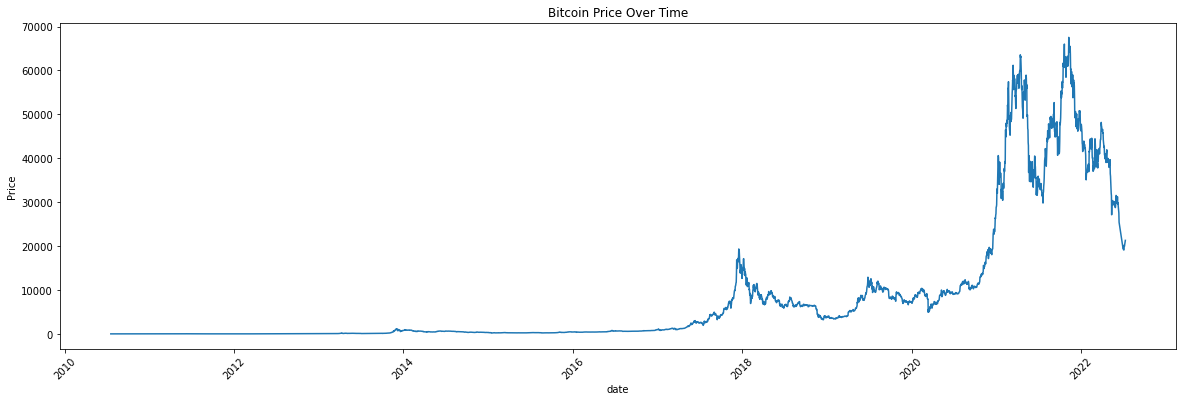

In [5]:
#Historic Price of Bitcoin over the time
# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df['date'], df['bitcoin_price'])

# Customize the plot
plt.title('Bitcoin Price Over Time')
plt.xlabel('date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Display the graph
plt.show()

# Download of Dogecoin

In [6]:
url = f'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=eur&from=1279324800&to=1684195200'

response = requests.get(url)
data = response.json()['prices']

df = pd.DataFrame(data, columns=['date', 'dogecoin_price'])
df.date = pd.to_datetime(df.date/1000, unit='s')
df['date'] = df['date'] + pd.DateOffset(days=1)
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values('date')

df['stonks'] = 0  # Initialize 'stonks' column with 0

# Compare 'bitcoin_price' with the previous row and update 'stonks' accordingly
# Determine a variantion wich doesnt affect our target ???dogecoin
df.loc[df['dogecoin_price'] < df['dogecoin_price'].shift(), 'stonks'] = -1
df.loc[df['dogecoin_price'] > df['dogecoin_price'].shift(), 'stonks'] = 1
df.to_csv('./data/dogecoin.csv', index=False)

In [7]:
#Check if is correct the data
df[df['date'] == pd.to_datetime('2021-11-01')]

/home/pereira/anaconda3/envs/daa/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,dogecoin_price,stonks
2874,2021-11-01,0.23207,-1


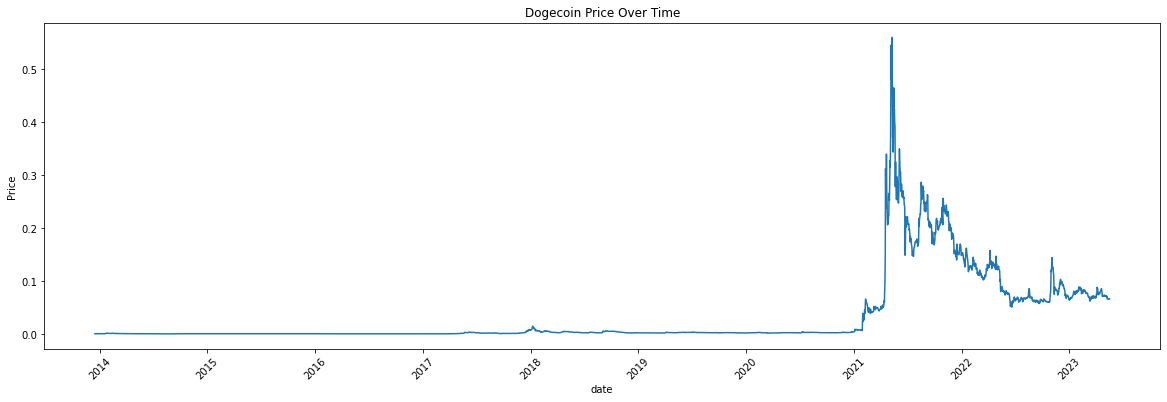

In [8]:
#Historic Price of Dogecoin over the time
# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df['date'], df['dogecoin_price'])

# Customize the plot
plt.title('Dogecoin Price Over Time')
plt.xlabel('date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Display the graph
plt.show()

# Download of Tweets

In [19]:
#Read the data from the csv file and store it in a dataframe
datasets = []
folder_path = "data/original_tweets"  # Update the folder path

start_year = 2010
end_year = 2022

for year in range(start_year, end_year + 1):
    file_name = str(year) + ".csv"
    file_path = os.path.join(folder_path, file_name)

    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        datasets.append(df)
    else:
        print(f"File not found: {file_path}")

# Store the DataFrames in variables df_0 to df_12
for i, df in enumerate(datasets):
    globals()[f"df_{i}"] = df

print("Finished creating DataFrames")


Finished creating DataFrames


In [21]:
#Concatenate all the dataframes into a single dataframe
dfs = [globals()[f"df_{i}"] for i in range(13)]
df_elon = pd.concat(dfs, ignore_index=True)

In [22]:
#Check if is correct the data
df_elon.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Text Mining

In [23]:
#Drop duplicated rows, reset index and drop columns.

df_elon.reset_index(inplace=True)

df_elon = df_elon[df_elon['language'] != 'und']

df_elon.drop(columns=['index', 'Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone', 'place', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'time', 'mentions', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'user_id' , 'user_id_str', 'name', 'day', 'hashtags', 'username', 'language'], inplace=True)

df_elon.drop_duplicates(inplace=True)

#Convert all dates for year-month-day
df_elon['date'] = df_elon['date'].str.split(' ').str[0]
df_elon['date'] = pd.to_datetime(df_elon['date']).dt.date

df_elon

,date,tweet
0,2010-06-04,"Please ignore prior tweets, as that was someon..."
1,2011-12-28,@TheOnion So true :)
2,2011-12-27,If you ever wanted to know the *real* truth ab...
3,2011-12-26,Walked around a neighborhood recently rebuilt ...
4,2011-12-26,"It was Xmas, so we brought presents for the ki..."
...,...,...
34356,2022-01-03,@jack Reminds me of when I hex edited Ultima V...
34357,2022-01-03,@ClaudioOmbrella @Tesla @slcuervo @alex_avoigt...
34358,2022-01-03,@auren There is no way to be in touch with vot...
34360,2022-01-02,Let’s make the roaring 20’s happen!


In [24]:
pattern_mention = r'@\w+'  # Matches "@" followed by word characters
pattern_url = r'http[s]?://\S+'  # Matches URLs starting with "http://" or "https://"

# Function to clean mentions and URLs
def clean_tweet(tweet):
    tweet = re.sub(pattern_mention, '', tweet)
    tweet = re.sub(pattern_url, '', tweet)
    return tweet

# Apply cleaning function to 'Tweets' column
df_elon['tweet'] = df_elon['tweet'].apply(clean_tweet)
df_elon.reset_index(inplace=True)
df_elon.drop(['index'], inplace=True, axis=1)
df_elon

,date,tweet
0,2010-06-04,"Please ignore prior tweets, as that was someon..."
1,2011-12-28,So true :)
2,2011-12-27,If you ever wanted to know the *real* truth ab...
3,2011-12-26,Walked around a neighborhood recently rebuilt ...
4,2011-12-26,"It was Xmas, so we brought presents for the ki..."
...,...,...
13829,2022-01-03,Reminds me of when I hex edited Ultima V to g...
13830,2022-01-03,🇨🇭Yay Switzerland!! 🇨🇭
13831,2022-01-03,There is no way to be in touch with voters wh...
13832,2022-01-02,Let’s make the roaring 20’s happen!


In [25]:
df_clean = df_elon.copy()

def clean_data(df, col, clean_col):

    # change to lower and remove spaces on either side
    df[clean_col] = df[col].apply(lambda x: x.lower().strip())

    # remove extra spaces in between
    df[clean_col] = df[clean_col].apply(lambda x: re.sub(' +', ' ', x))

    # remove punctuation
    df[clean_col] = df[clean_col].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))

    # remove stopwords and get the stem
    #df[clean_col] = df[clean_col].apply(lambda x: ' '.join(st.stem(text) for text in x.split() if text not in stop_words))

    return df

# calling function
df_clean = clean_data(df_clean, 'tweet', 'clean_tweet')
df_clean.sort_values('date')

,date,tweet,clean_tweet
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someon...
25,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...
24,2011-12-01,I made the volume on the Model S go to 11. ...,i made the volume on the model s go to 11 now...
23,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twa...
22,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw
...,...,...,...
13441,2022-03-05,"Obviously, this would negatively affect Tesla,...",obviously this would negatively affect tesla ...
13443,2022-03-05,Haha sure :),haha sure
13430,2022-03-05,"In a way, this is free QA haha",in a way this is free qa haha
13438,2022-03-05,Exactly,exactly


In [26]:
# Define the list of words you want to check for
words_to_check = ["dogecoin", "Doge", "doge", "Dogecoin","bitcoin", "Bitcoin", "ethereum", "litecoin", "price", "value", "quotation", "trading", "cryptocurrency", "crypto", "cryptocurrency market", "coinbase", "binance", "kraken"]

# Filter rows where any of the words are present in the column
filtered_data = df_clean[df_clean['clean_tweet'].str.contains('|'.join(words_to_check))]

selected_columns = ['date', 'clean_tweet']
new_dataset = filtered_data[selected_columns]

# The filtered_data DataFrame will now contain only the rows where any of the words are present or not present, respectively
new_dataset.reset_index(drop=True, inplace=True)

new_dataset.to_csv('./data/only_clean_tweets.csv', index=False)